## Simple visualizations of the impact of null values

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

sample_submission.csv
test.csv
train.csv



In [2]:
df = pd.read_csv('../input/train.csv')

## Considering columns with null values
Firstly, we will replace -1 values with null values, create an isnull dataframe, and then only keep columns that actually have null values.

In [3]:
# Replace -1 values as nulls
df = df.replace(-1,np.NaN)

# Create isnull dataframe
df_nan = df.isnull()

# Create df only including columns with null values
df_nan = df_nan[[col for col in df_nan.columns if df_nan[col].sum() > 0]]

## Examining the proportion of target 1's for null and non-null values
We will create a dataframe that stores the proportion of target 1's for each column's null and non-null values

In [4]:
# Create dataframe of the ratio of target 1's for null / non-null values in each column

# Create empty list to contain series of the proportion of target 1's for null and non-null
nan_vs_true_list = []

# For each column
for col in df_nan.columns:
    
    # Cross tabulate target 1's and 0's vs. null and non-null values for each column
    nan_vs_target = pd.crosstab(df['target'], df_nan[col])
    
    # Convert to ratio
    nan_vs_target = nan_vs_target / nan_vs_target.sum()
    
    # Consider only the target 1's
    nan_vs_true = nan_vs_target.loc[1,:]
    
    # Append this series to list
    nan_vs_true_list += [nan_vs_true]

# Create dataframe of the ratio of target 1's for null / non-null values in each column
df_nan_vs_true = pd.concat(nan_vs_true_list, axis = 1, keys = df_nan.columns)
df_nan_vs_true

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_05_cat,ps_car_07_cat,ps_car_09_cat,ps_car_11,ps_car_12,ps_car_14
False,0.036394,0.036397,0.035986,0.038228,0.036397,0.036448,0.044809,0.040291,0.035626,0.036395,0.036448,0.036448,0.036141
True,0.185185,0.397590,0.083319,0.028393,0.317757,0.000000,0.032707,0.031709,0.078162,0.091388,0.000000,0.000000,0.040427


## Visualizations
Here we create two simple visualizations:
1.  Comparing the proportion of target 1's for null and non-null values for each category
2. Examining the ratio of these for each category

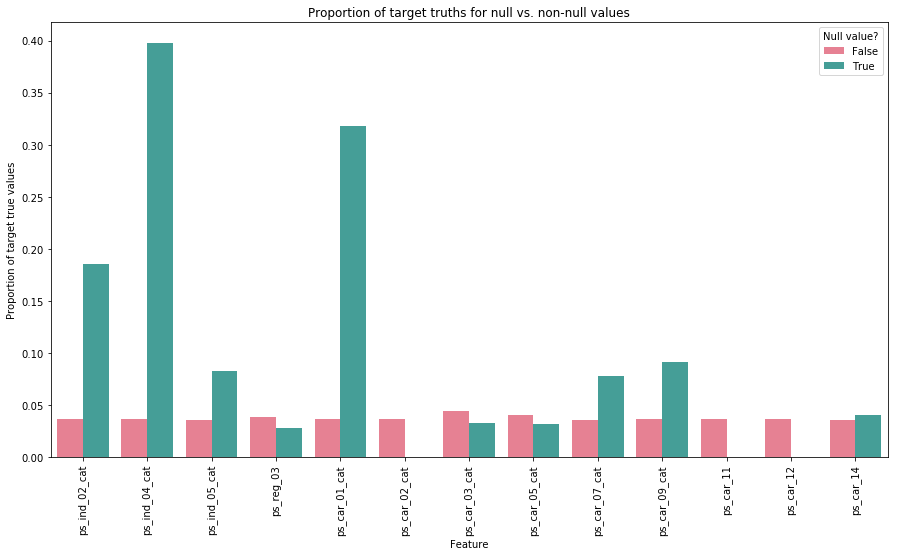

In [5]:
# Visualize the proportion of target 1's for null vs. non-null values
melted = pd.melt(df_nan_vs_true.T.reset_index(), id_vars = 'index')

f,axarray = plt.subplots(1,1,figsize=(15,8))

sns.barplot(data = melted, x = 'index', y = 'value', hue = 'variable', palette = 'husl')

plt.title('Proportion of target truths for null vs. non-null values')
plt.xticks(rotation = 'vertical')

plt.xlabel('Feature')
plt.ylabel('Proportion of target true values')
plt.legend(title = 'Null value?')

plt.show()

In [6]:
# Examine the ratio of target 1's for null vs. non-null values
df_nan_vs_true.loc['Null ratio'] = df_nan_vs_true.loc[True] / df_nan_vs_true.loc[False]
df_nan_vs_true

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_05_cat,ps_car_07_cat,ps_car_09_cat,ps_car_11,ps_car_12,ps_car_14
False,0.036394,0.036397,0.035986,0.038228,0.036397,0.036448,0.044809,0.040291,0.035626,0.036395,0.036448,0.036448,0.036141
True,0.185185,0.397590,0.083319,0.028393,0.317757,0.000000,0.032707,0.031709,0.078162,0.091388,0.000000,0.000000,0.040427
Null ratio,5.088411,10.923667,2.315345,0.742729,8.730322,0.000000,0.729914,0.786998,2.193922,2.511019,0.000000,0.000000,1.118605


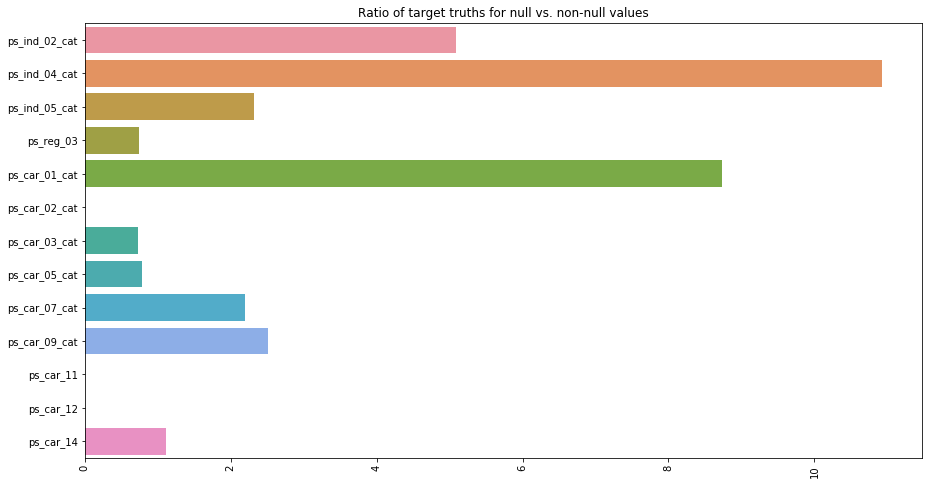

In [7]:
f,axarray = plt.subplots(1,1,figsize=(15,8))
plt.title('Ratio of target truths for null vs. non-null values')
plt.xticks(rotation = 'vertical')
bins = df_nan_vs_true.loc['Null ratio']
sns.barplot(x=bins.values,y=bins.index,orient='h')
plt.show()